# Fitting camera parameters by objects of given height

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import importlib
import CameraTransform as ct
importlib.reload(ct)

<module 'CameraTransform' from 'd:\\repositories\\cameratransform\\CameraTransform\\__init__.py'>

Then we define the intrinsic parameters of the camera:

In [2]:
# intrinsic camera parameters
f = 6.2
sensor_size = (6.17, 4.55)
image_size = (3264, 2448)

# initialize the camera
cam = ct.Camera(ct.RectilinearProjection(focallength_mm=f, sensor=sensor_size, image=image_size))

In [3]:
# define the horizon points
horizon = np.array([[ 185.708,  795.467],
                    [1689.906,  847.153],
                    [2709.230,  880.665],
                    [3171.416,  896.025],
                    [ 938.221,  820.386]])

In [4]:
# define the feet and head points
feet_cam = np.array([[2444.983, 1569.205], [2648.486, 1556.647], [2843.791, 1545.462], [2820.373, 1445.683], [3193.688, 1554.84 ], [1902.72 , 1412.185], [1543.973, 1497.422], [1490.77 , 1407.026], [1660.66 , 1563.188], [1787.174, 1588.567], [2020.442, 1606.385], [2074.914, 1606.847], [2555.684, 1607.042], [2904.453, 1462.714], [3084.393, 1597.782], [1595.931, 1520.728], [1562.091, 1481.46 ], [1851.034, 1441.808], [2215.969, 1419.911], [2756.997, 1535.729], [1969.461, 1597.528], [1870.15 , 1449.718]])
heads_cam = np.array([[2444.983, 1548.691], [2648.486, 1537.182], [2843.791, 1526.287], [2820.373, 1429.232], [3193.688, 1535.311], [1902.72 , 1395.279], [1543.973, 1478.906], [1490.77 , 1390.332], [1660.66 , 1542.916], [1787.174, 1566.117], [2020.442, 1584.135], [2074.914, 1585.859], [2555.684, 1588.504], [2904.453, 1445.887], [3084.393, 1576.425], [1595.931, 1501.253], [1562.091, 1463.102], [1851.034, 1424.282], [2215.969, 1403.555], [2756.997, 1516.264], [1969.461, 1576.358], [1870.15 , 1432.114]])

methods = ["Nelder-Mead",
"Powell",
"CG",
"BFGS",
"Newton-CG",
"L-BFGS-B",
"TNC",
"COBYLA",
"SLSQP",
"trust-const",
"dogleg",
"trust-ncg",
"trust-exact",
"trust-krylov"]
cam.fit_method = methods[1]
cam.roll_deg = None
#print(" ".join([line for line in repr(heads_cam.T).split()]))#.replace("         ", " "))

# fit the camera parameters from the feet and heads
#cam.parameters.roll_deg = 0
print(cam.roll_deg, cam.defaults.roll_deg)
print(cam.parameters.get_fit_parameters())
for method in methods:
    cam = ct.Camera(ct.RectilinearProjection(focallength_mm=f, sensor=sensor_size, image=image_size))
    
    cam.fit_method = methods[1]
    cam.elevation_m = None
    cam.roll_deg = None
    cam.tilt_deg = None
    p = cam.fitCamParametersFromObjects(feet_cam, heads_cam, object_height=1, points_horizon=horizon)
    print(method, p["fun"])
# print the fitted camera parameters
print(cam)
#import os
#os.chdir("docs//examples//heights")

0 0
['elevation_m', 'tilt_deg', 'roll_deg', 'heading_deg', 'pos_x_m', 'pos_y_m']


C:\Software\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)


Nelder-Mead 2.1871713938875907
Powell 2.1871713938875907
CG 2.1871713938875907
BFGS 2.1871713938875907
Newton-CG 2.1871713938875907
L-BFGS-B 2.1871713938875907
TNC 2.1871713938875907
COBYLA 2.1871713938875907
SLSQP 2.1871713938875907
trust-const 2.1871713938875907
dogleg 2.1871713938875907
trust-ncg 2.1871713938875907
trust-exact 2.1871713938875907
trust-krylov 2.1871713938875907
CameraTransform(
  intrinsic (RectilinearProjection):
    f:		6.2 mm
    sensor:	6.17×4.55 mm
    image:	3264×2448 px
  position:
    x:	0.000000 m
    y:	0.000000 m
    h:	34.027256 m
  orientation:
    tilt:		83.307926°
    roll:		-1.916219°
    heading:	0.000000°
)


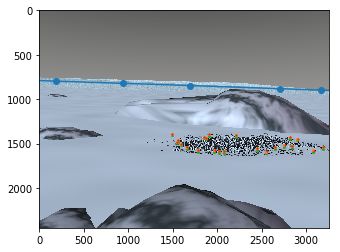

In [5]:
""" plot the results """
# load the image
im = plt.imread("CameraImage.jpg")

# plot the input horizon
plt.plot(horizon[:, 0], horizon[:, 1], 'C0o')
# plot the fitted horizon
horizon_fitted = cam.getImageHorizon()
plt.plot(horizon_fitted[:, 0], horizon_fitted[:, 1], '-C0', ms=2)

# plot the input feet and heads
plt.plot(feet_cam[:, 0], feet_cam[:, 1], 'C2o', label='feet', ms=2)
plt.plot(heads_cam[:, 0], heads_cam[:, 1], 'C1o', label='head', ms=2)

# project the feet to the world
feet_world = cam.spaceFromImage(feet_cam, Z=0)
# the heads are just 1m over the feet
head_world = np.array([feet_world[:, 0], feet_world[:, 1], feet_world[:, 2]+1]).T
# estimate the heads back in the camera image
head_cam_estimate = cam.imageFromSpace(head_world)

# plot the reconstructed heads
plt.plot(head_cam_estimate[:, 0], head_cam_estimate[:, 1], 'C3+', label='projection', ms=2)

# show the image
plt.imshow(im)

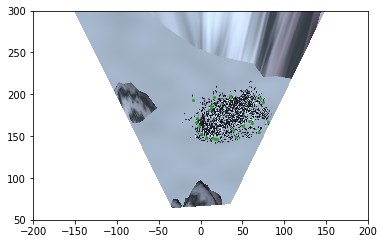

In [6]:
# plot the feet in the world coordinates
feet = cam.spaceFromImage(feet_cam, Z=0)
plt.plot(feet[:, 0], feet[:, 1], 'C2o', ms=2)

# display a top view of the image
im2 = cam.getTopViewOfImage(im, [-200, 200, 50, 300], scaling=0.1, do_plot=True)